In [15]:
%pylab inline
import pylab as pl
import numpy as np

Populating the interactive namespace from numpy and matplotlib



Basic principles of machine learning

Introducing the scikit-learn estimator object

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression(normalize=True)
print model.normalize

True


In [18]:
print model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [19]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

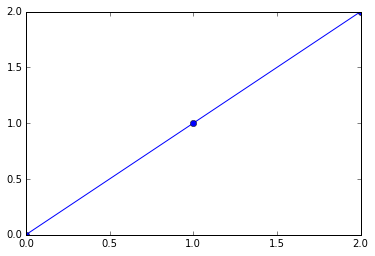

In [20]:
_ = pl.plot(x, y, marker='o')

In [21]:
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [22]:
model.fit(X, y) 
model.coef_

array([ 1.])

Supervised Learning: Classification and regression

In [23]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print knn.predict([3,5,4,2])
print iris.target_names[knn.predict([[3, 5, 4, 2]])]

[2]
['virginica']


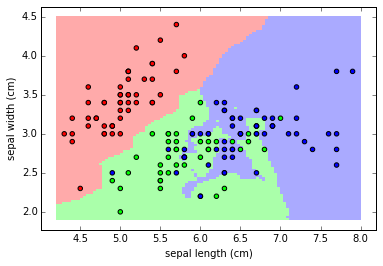

In [26]:
# A plot of the sepal space and the prediction of the KNN
"""
Small helpers for code that is not shown in the notebooks
"""

from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')


def plot_polynomial_regression():
    rng = np.random.RandomState(0)
    x = 2*rng.rand(100) - 1

    f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
    y = f(x) + .4 * rng.normal(size=100)

    x_test = np.linspace(-1, 1, 100)

    pl.figure()
    pl.scatter(x, y, s=4)

    X = np.array([x**i for i in range(5)]).T
    X_test = np.array([x_test**i for i in range(5)]).T
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    pl.plot(x_test, regr.predict(X_test), label='4th order')

    X = np.array([x**i for i in range(10)]).T
    X_test = np.array([x_test**i for i in range(10)]).T
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    pl.plot(x_test, regr.predict(X_test), label='9th order')

    pl.legend(loc='best')
    pl.axis('tight')
    pl.title('Fitting a 4th and a 9th order polynomial')

    pl.figure()
    pl.scatter(x, y, s=4)
    pl.plot(x_test, f(x_test), label="truth")
    pl.axis('tight')
    pl.title('Ground truth (9th order polynomial)')

plot_iris_knn()

Model coefficient: 3.93491, and intercept: 1.46229


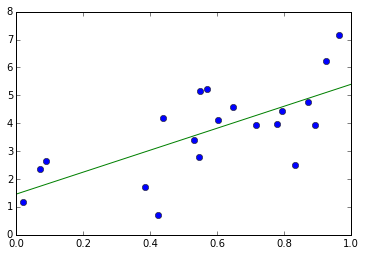

In [25]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print "Model coefficient: %.5f, and intercept: %.5f" % (model.coef_, model.intercept_)

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)
import pylab as pl
pl.plot(X.squeeze(), y, 'o')
pl.plot(X_test.squeeze(), y_test)